# Marketing Campaign Analysis

## Introduction

Marketing campaigns are crucial for driving customer engagement, boosting sales, and strengthening brand loyalty. However, not all campaigns yield the desired outcomes. This project focuses on analyzing a marketing campaign dataset to uncover key insights, identify underperforming areas, and propose data-driven strategies for improvement.

The dataset contains customer demographics, spending behavior, and campaign response data, allowing us to explore the following objectives:

1. **Assess campaign effectiveness** and identify patterns in customer engagement.
2. **Analyze spending habits** across product categories and customer segments.
3. **Provide actionable recommendations** to enhance future marketing efforts.

## Objectives

- Conduct **Exploratory Data Analysis (EDA)** to clean, understand, and visualize the data.
- Perform **Statistical Analysis** to identify factors influencing campaign performance and spending behaviors.
- Use **Data Visualization** to communicate findings and support decision-making.

## Tools & Techniques

- **Languages**: Python (Pandas, NumPy, Matplotlib, Seaborn, Statsmodels, Scipy)
- **Techniques**:
  - Data Wrangling
  - Descriptive and Inferential Statistics
  - Regression Analysis
  - Feature Engineering
- **Visualization**: Data storytelling through interactive charts and graphs


In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [136]:
data= pd.read_csv("marketing_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [137]:
data.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

***clean up column names***

In [138]:
data.columns=data.columns.str.strip()


In [139]:
data['Income']= data['Income'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

**Removing null values*

In [140]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

<Axes: ylabel='Income'>

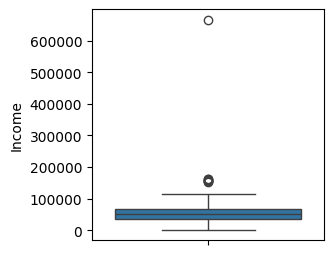

In [141]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Income'])

Text(0.5, 1.0, 'Income distribution')

<Figure size 300x300 with 0 Axes>

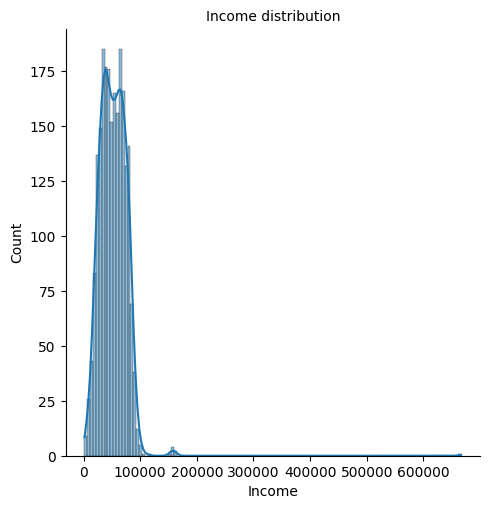

In [142]:
plt.figure(figsize=(3,3))

sns.displot(data['Income'], kde=True)
plt.title('Income distribution', size=10)

In [143]:
#there are outliers in income column, so apply meadian imputation to income column

data['Income']= data['Income'].fillna(data['Income'].median())

In [144]:
#change data types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [145]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')
data['Year_Birth']=data['Year_Birth'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16756\2307656710.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')


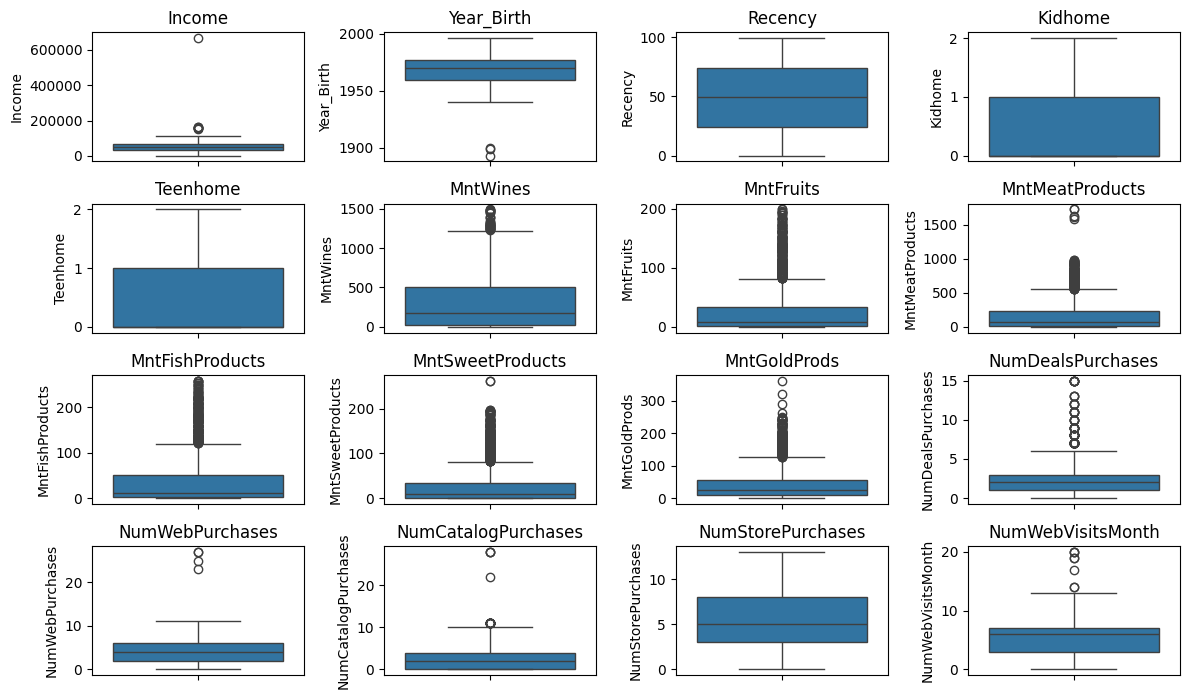

In [146]:
# Select appropriate columns
selected_columns = [
    'Income','Year_Birth', 'Recency', 'Kidhome',
       'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

# Loop through columns to create boxplots
plt.figure(figsize=(12,7 ))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on number of columns
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [147]:
#Remove rows where Year_Birth <= 1900
data = data[data['Year_Birth'] > 1900].reset_index(drop=True)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

**Feature Engineering**

 1. Create Age Column
- Derive the age of customers by subtracting their `Year_Birth` from the current year.
- **Formula:** `Age = Current_Year - Year_Birth`

2. Customer Tenure
- Calculate the tenure of customers (in years or months) based on the difference between the `Dt_Customer` column (date of enrollment) and the current date.
- **Formula:** `Tenure = Current_Date - Dt_Customer`

3. Total Spending
- Sum all the monetary columns (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`) to compute the total spending of each customer.
- **Formula:** `Total_Spending = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds`

4. Family Size
- Calculate the family size by adding `Kidhome` and `Teenhome` columns.
- Optionally, adjust based on


In [ ]:
#Age column
data['Age'] = datetime.datetime.now().year-data['Year_Birth']



(0       54
 1       63
 2       66
 3       57
 4       35
         ..
 2232    48
 2233    47
 2234    48
 2235    46
 2236    55
 Name: Age, Length: 2237, dtype: int64,
 0       1970
 1       1961
 2       1958
 3       1967
 4       1989
         ... 
 2232    1976
 2233    1977
 2234    1976
 2235    1978
 2236    1969
 Name: Year_Birth, Length: 2237, dtype: int64)

In [172]:
#create Tenure
data['Tenure_days'] = (datetime.datetime.now()- data['Dt_Customer']).dt.days
data['Tenure_years']=data['Tenure_days']/365
data['Tenure_years']=data['Tenure_years'].astype(int)

In [174]:
data['Tenure_years'].unique()

array([10, 11, 12])

In [176]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Tenure_days,Tenure_years
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,54,3822,10
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,63,3823,10
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,66,3856,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,57,3858,10
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,35,3891,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,48,4288,11
2233,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,47,4332,11
2234,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,48,4382,12
2235,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,46,4386,12
